Krish Naik Tutorial
https://www.youtube.com/watch?v=TelJFE7bx0Q&list=PLZoTAELRMXVPjaAzURB77Kz0YXxj65tYz&index=4

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report, accuracy_score

##Linear Regression, Ridge and Lasso

###Preparing data

Downloading dataset, preparing data, dividing dataset into independent and dependent features

In [ ]:
# from sklearn.datasets import load_boston
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [ ]:
data = pd.DataFrame(data)

In [ ]:
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [ ]:
data.columns = col_names

In [ ]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
target = pd.DataFrame(target)

In [ ]:
target.columns = ['PRICE']

In [ ]:
target

,PRICE
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


###Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(404, 102, 404, 102)

###Linear regression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

#Scoring = negative MSE, cross val = 5
mse = cross_val_score(lin_reg, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)

In [ ]:
print(mse)

[-17.20183677 -34.40858715 -23.73328987 -20.28446607 -22.6439115 ]


In [ ]:
mean_mse = np.mean(mse)
mean_mse

-23.654418270304568

In [ ]:
y_pred = lin_reg.predict(X_test)

In [ ]:
# The coefficients
print("Coefficients: \n", lin_reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [[-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
  -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
   2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
  -5.08571424e-01]]
Mean squared error: 24.29
Coefficient of determination: 0.67


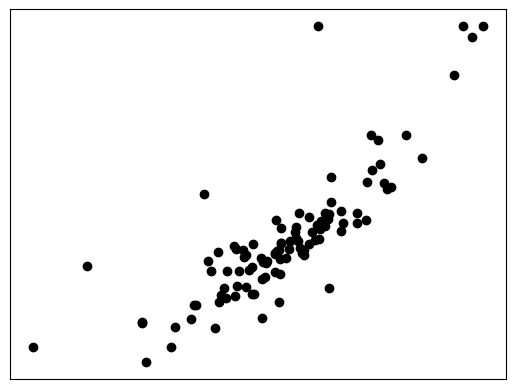

In [ ]:
# Plot outputs
plt.scatter(y_pred, y_test, color="black")
# plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

###Ridge regression

In [ ]:
ridge = Ridge()
params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regressor = GridSearchCV(ridge, params, scoring = 'neg_mean_squared_error', cv = 5)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20]},
             scoring='neg_mean_squared_error')

In [ ]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1e-15}
-23.65441827030464


###Lasso regression

In [ ]:
lasso = Lasso()
params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_regressor = GridSearchCV(lasso, params, scoring = 'neg_mean_squared_error', cv = 5)
lasso_regressor.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.649e+03, tolerance: 2.882e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.826e+03, tolerance: 2.764e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.233e+03, tolerance: 2.710e+00

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20]},
             scoring='neg_mean_squared_error')

In [ ]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-15}
-23.65441827030463


In [ ]:
y_pred = lasso_regressor.predict(X_test)

In [ ]:
r2_score_lasso = r2_score(y_pred, y_test)
r2_score_lasso

0.6333247469014358

##Logistic regression - binary classification

###Preparing data

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
df = load_breast_cancer()

# Independend features
X = pd.DataFrame(df['data'], columns = df['feature_names'])

In [ ]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Dependent features
y = pd.DataFrame(df['target'], columns = ['target'])

In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   target  569 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB


###Checking if the dataset is balanced

In [ ]:
y['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

###Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### GridSearchCV for the best results

In [ ]:
params = {'C': [1, 5, 10], 'max_iter': [100, 150]}

In [ ]:
model1 = LogisticRegression(C = 100, max_iter = 100)

Scoring function = f1, because it is not yet decided if the accuracy or recall is more imporant in this classification task

In [ ]:
model = GridSearchCV(LogisticRegression(), param_grid = params, scoring = 'f1', cv = 5)

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 5, 10], 'max_iter': [100, 150]},
             scoring='f1')

In [ ]:
print(model.best_params_)
print(model.best_score_)

{'C': 1, 'max_iter': 150}
0.9652666888473614


In [ ]:
y_pred = model.predict(X_test)

###Confusion matrix, accuracy score, classification report

In [ ]:
confusion_matrix(y_pred, y_test)

array([[39,  1],
       [ 4, 70]])

In [ ]:
accuracy_score(y_test, y_pred)

0.956140350877193

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



##Naive Bayes

##Decision Trees

### Iris dataset

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### Classifier

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini', splitter = 'best', max_depth = 3)

In [ ]:
classifier.fit(iris.data, iris.target)

DecisionTreeClassifier(max_depth=3)

###Plot

[Text(0.375, 0.875, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.25, 0.375, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.125, 0.125, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.375, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.75, 0.375, 'x[2] <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]')]

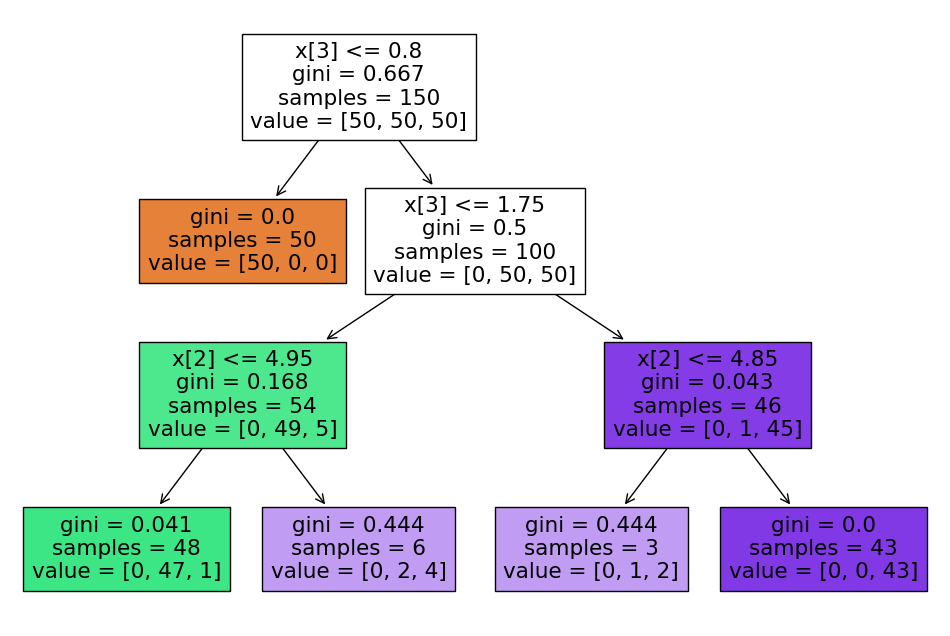

In [ ]:
plt.figure(figsize = (12, 8))
tree.plot_tree(classifier, filled = True)

## K-means

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

###Generating data

In [ ]:
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

### Finding number of clusters with the Elbow method

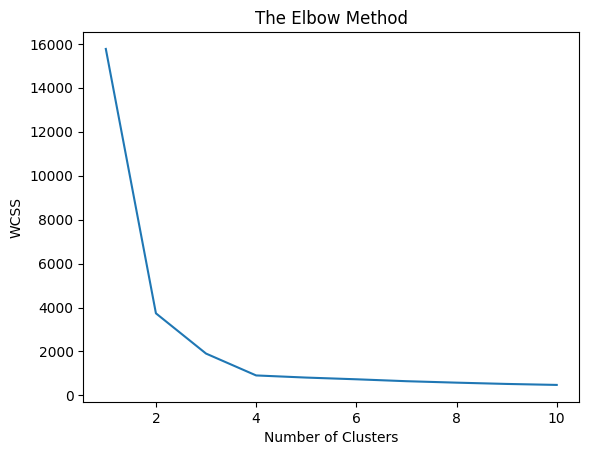

In [ ]:
from sklearn.cluster import KMeans

wcss=[] # Within cluster sum of squares
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', n_init = 10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

4 clusters are taken into consideration with the Elbow Method

###Prediction

In [ ]:
clusterer = KMeans(n_clusters = 4, random_state = 10, n_init = 10)
cluster_labels = clusterer.fit_predict(X)
print(cluster_labels)

[2 2 3 1 0 1 0 0 0 0 2 2 0 1 0 2 0 2 1 0 3 3 0 1 0 0 1 1 3 0 2 1 0 2 0 2 3
 3 2 3 0 3 1 0 0 2 3 0 1 1 1 3 3 0 2 3 3 3 3 0 1 1 3 0 1 0 2 0 3 3 2 3 0 2
 0 0 2 0 0 3 1 1 3 1 1 3 3 1 3 3 1 2 3 0 1 2 2 0 2 1 1 2 1 3 1 0 0 1 1 3 0
 2 1 3 1 3 1 0 1 0 3 2 2 3 0 3 1 2 2 0 1 3 3 3 3 2 1 0 1 1 0 2 0 1 1 1 0 0
 2 2 3 3 1 2 1 3 3 3 3 3 3 3 3 3 1 2 2 2 0 1 2 3 0 2 1 3 3 3 3 2 0 3 1 2 2
 3 0 2 2 0 1 1 2 2 0 1 0 2 2 1 2 3 1 0 0 2 0 3 2 0 3 0 3 2 0 0 0 1 3 1 0 2
 3 0 3 3 3 1 3 1 2 3 2 3 1 1 3 2 1 2 0 3 2 2 2 2 0 3 2 3 0 1 1 0 0 1 3 0 3
 1 0 1 3 3 1 0 2 2 3 3 3 0 1 1 0 1 3 2 1 2 1 2 2 1 2 1 1 0 3 3 3 0 0 3 2 1
 2 2 2 0 3 0 2 3 2 2 3 2 2 3 1 2 0 0 1 1 3 2 1 1 0 2 1 1 0 3 1 3 0 2 2 1 3
 2 0 1 1 0 0 0 2 0 1 1 3 1 1 1 1 2 2 0 1 3 0 2 1 3 1 0 1 3 0 3 1 0 0 2 1 2
 2 2 2 2 2 3 2 1 2 1 1 3 1 0 3 3 2 1 3 1 0 2 3 3 2 3 3 1 1 2 3 0 1 0 0 2 2
 0 2 3 3 2 3 2 3 1 2 1 3 0 1 3 0 1 2 0 1 1 3 0 3 0 2 1 2 0 1 2 2 2 3 1 0 2
 0 0 3 3 2 0 0 0 0 0 0 2 0 3 2 0 1 0 1 0 3 3 1 1 1 3 0 3 2 3 1 0 2 1 2 1 2
 0 1 1 2 3 0 2 3 3 3 2 0 

###Validation with the silhouette_score which ranges from -1 to 1

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


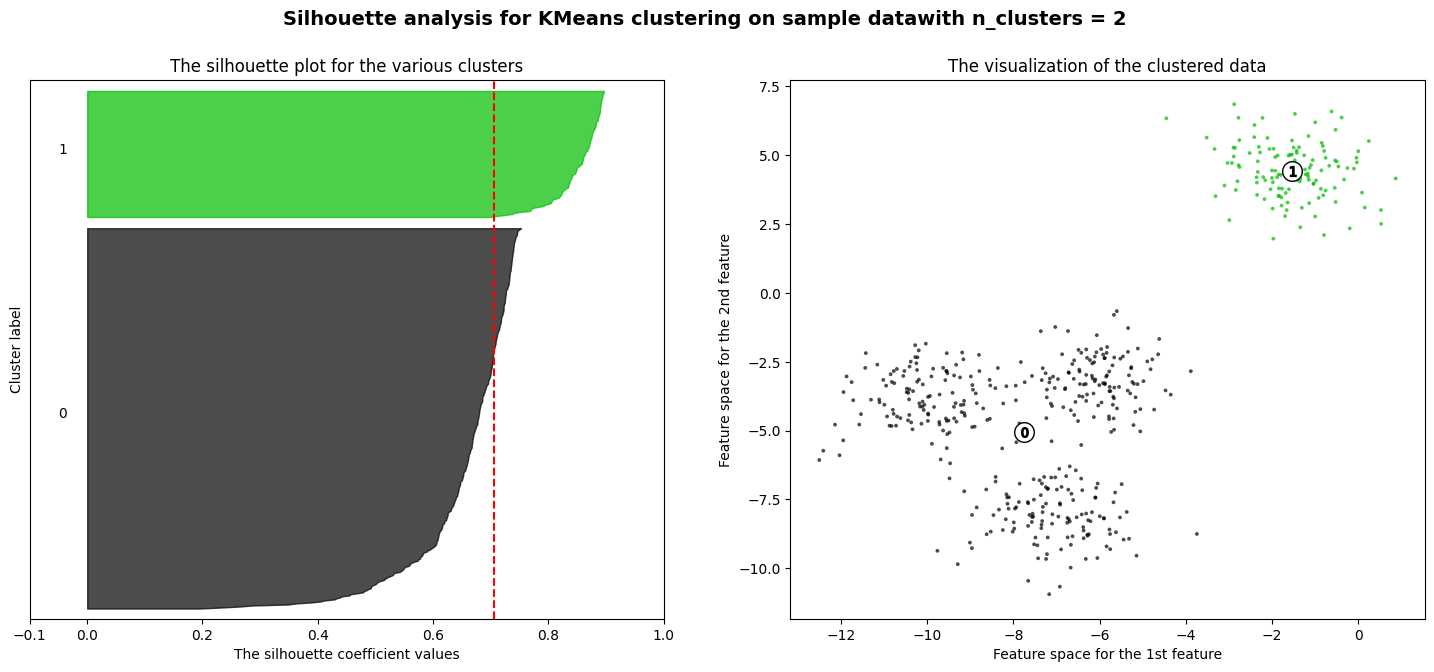

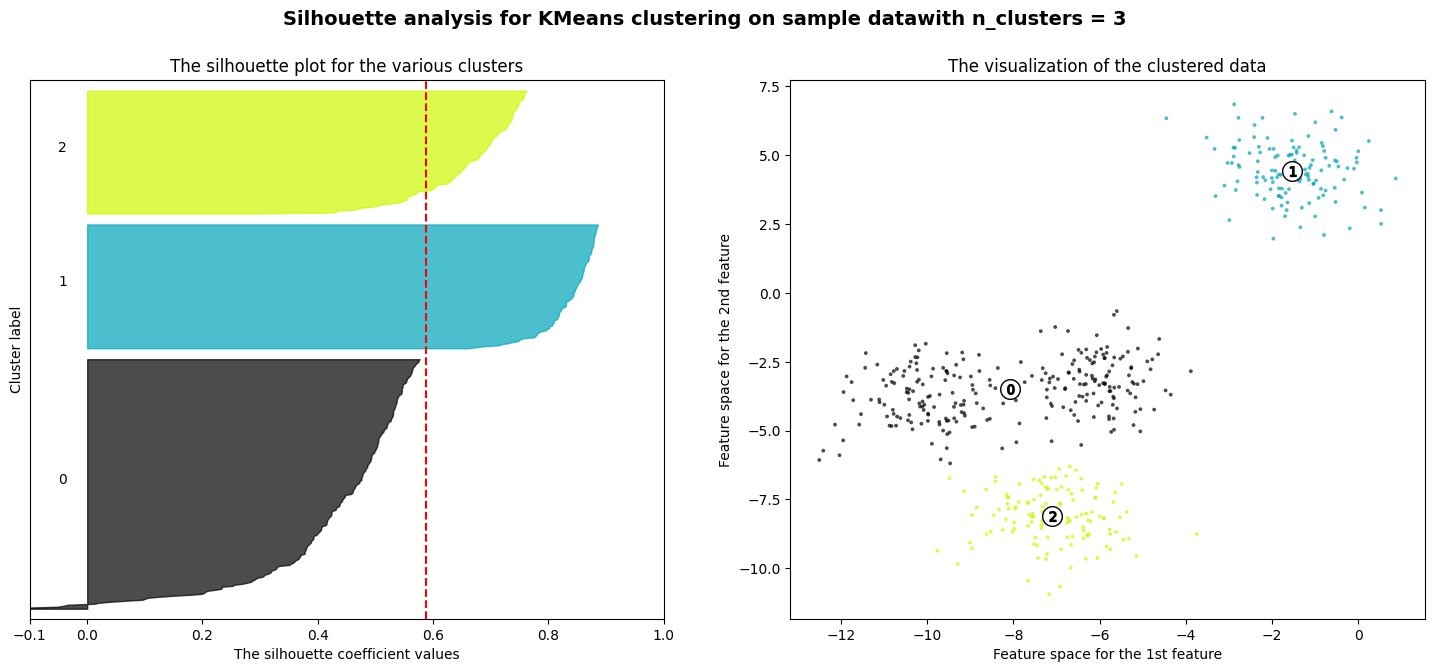

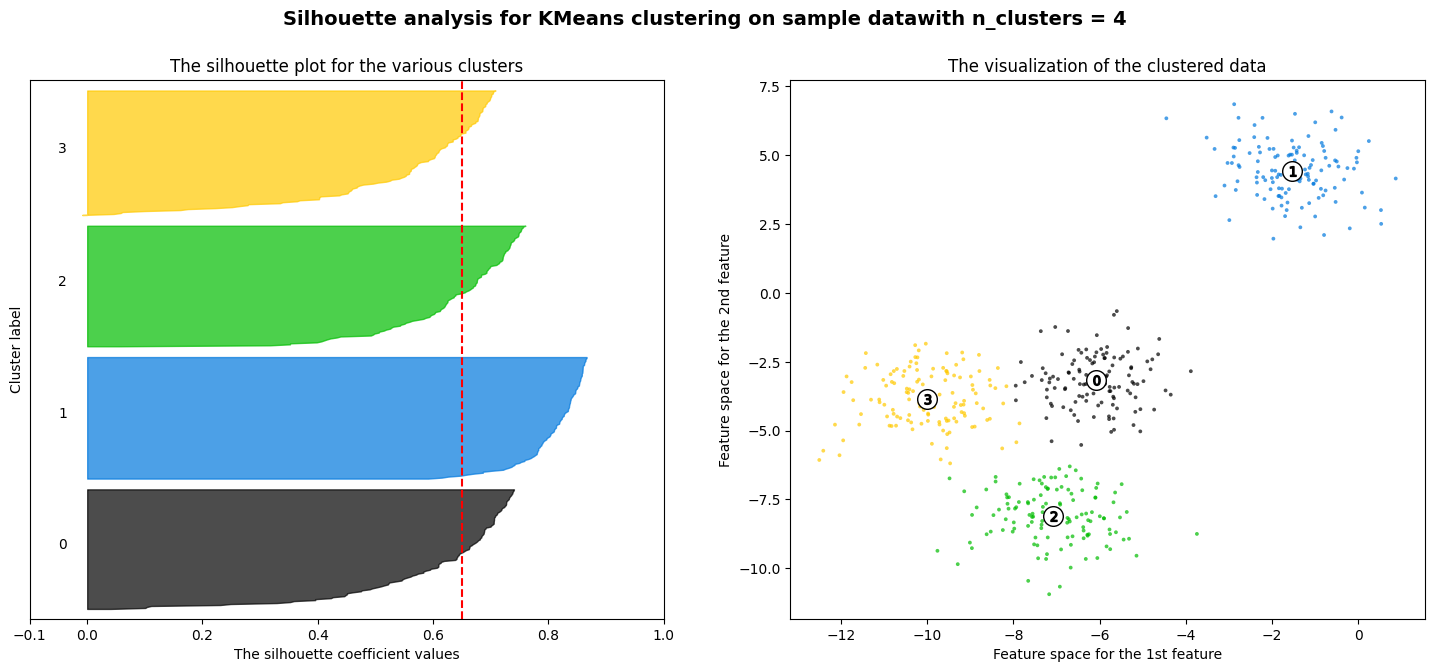

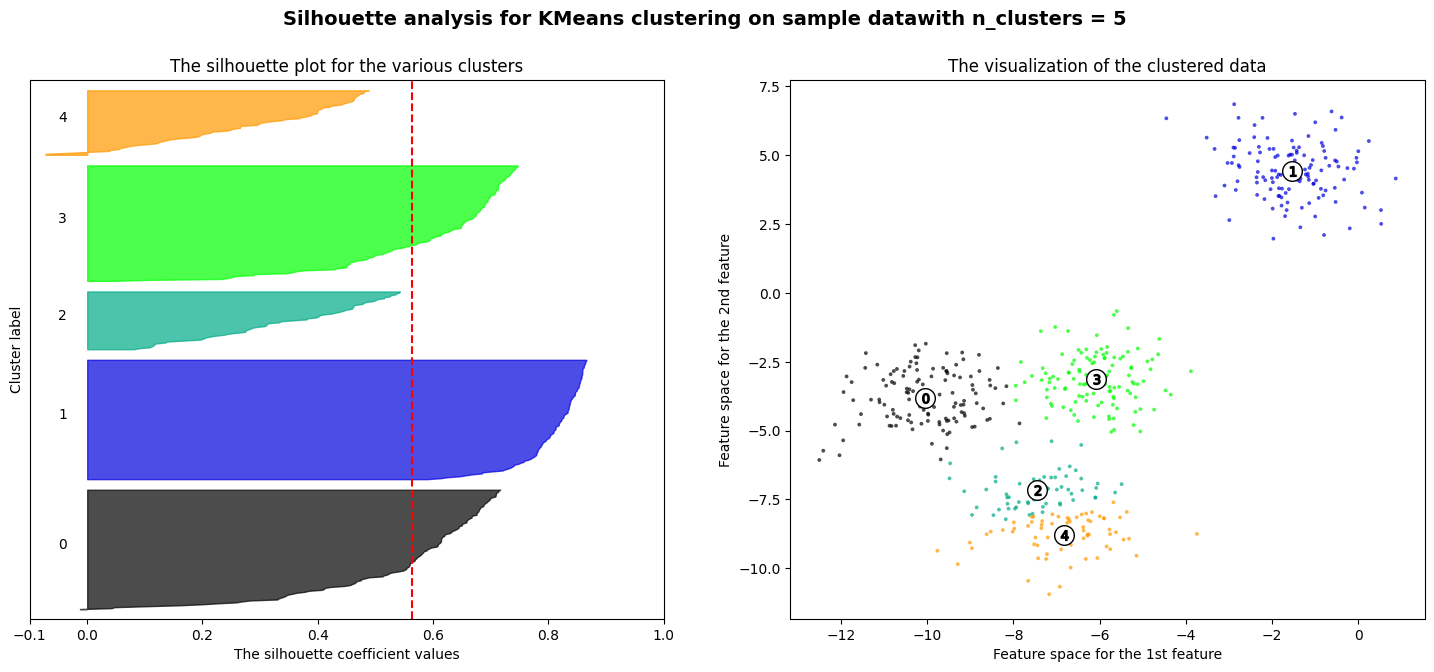

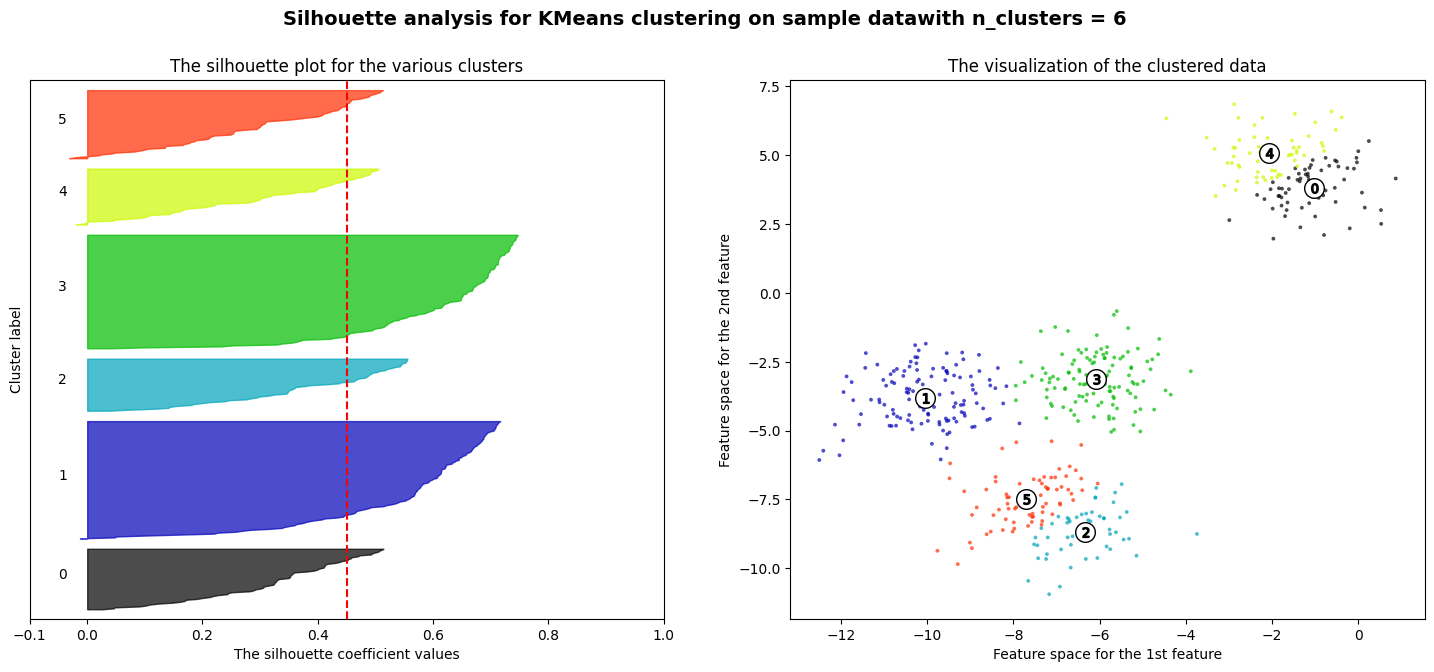

In [ ]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init = 10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data"
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

If there are negative values on the X axis (silhouette coefficient values) then the division is wrong - some points are closer to different cluster center than are labelled to.

##Statistics

In [ ]:
import statistics

### Tips dataset

In [ ]:
df = sns.load_dataset('tips')

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
np.mean(df['total_bill'])

19.78594262295082

In [ ]:
np.median(df['total_bill'])

17.795

In [ ]:
statistics.mode(df['total_bill'])

13.42

<Axes: >

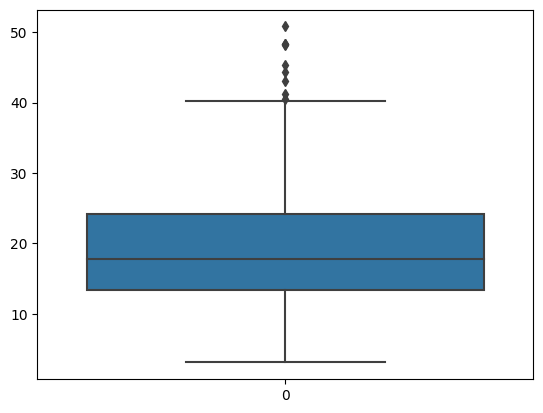

In [ ]:
sns.boxplot(df['total_bill'])

The outliers are visible there. They presence was suggested with the difference between median and the mean values.

<Axes: xlabel='total_bill', ylabel='Count'>

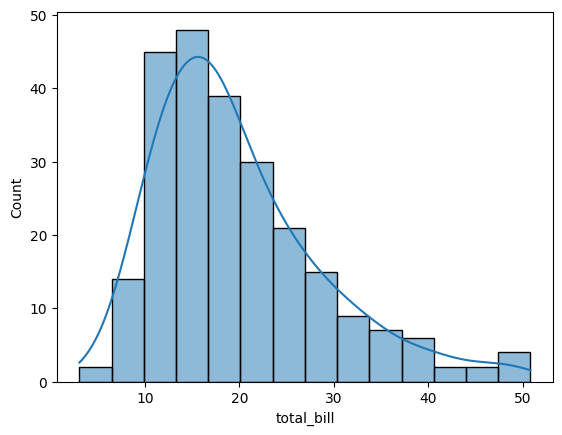

In [ ]:
sns.histplot(df['total_bill'], kde = True)

It's not a normal distributed data

### Iris dataset

In [ ]:
df1 = sns.load_dataset('iris')

In [ ]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Count'>

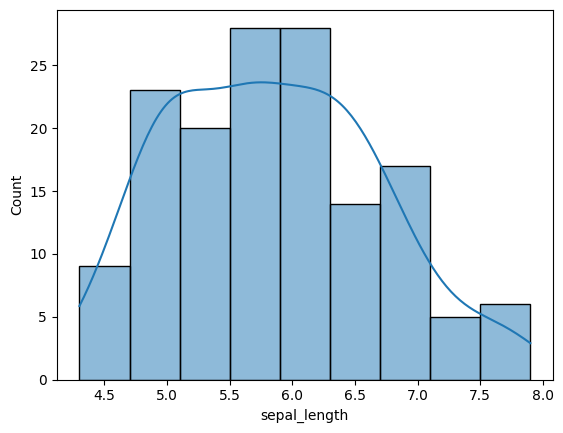

In [ ]:
sns.histplot(df1['sepal_length'], kde = True)

<Axes: xlabel='sepal_width', ylabel='Count'>

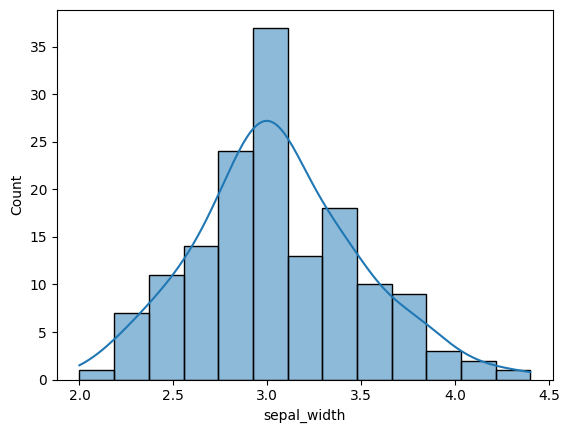

In [ ]:
sns.histplot(df1['sepal_width'], kde = True)

Sepal width as a gaussian distribution

In [ ]:
np.percentile(df1['sepal_length'], [25, 75])

array([5.1, 6.4])

###Outliers

Values lower/bigger than -3 sigma/3 sigma may be considered outliers

In [ ]:
## Defining the dataset
dataset = [11, 10, 12, 14, 12, 15, 14, 13, 15, 102, 12, 14, 17, 19, 107, 10, 13, 12, 14, 12, 108, 12, 11, 14,13, 15, 10, 15, 12, 10, 14, 13, 15, 10]

<Axes: ylabel='Count'>

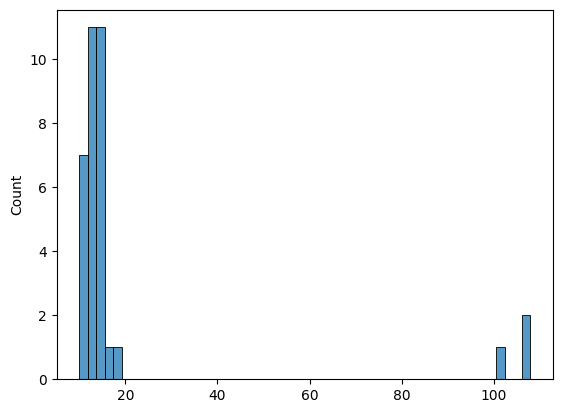

In [ ]:
sns.histplot(dataset)

#### Z-score

In [ ]:
outliers = []

def detect_outliers(data):
  threshold = 3 #3 sigma
  mean = np.mean(data)
  std = np.std(data)
  
  for value in data:
    z_score = (value - mean)/std
    if np.abs(z_score) > threshold:
      outliers.append(value)
  
  return outliers

In [ ]:
outliers = detect_outliers(dataset)
outliers

[102, 107, 108]

#### IQR (Interquartile range)

In [ ]:
outliers_IQR = []

# 1. Sorting the dataset
dataset = sorted(dataset)
# 2. Calculating Q1, Q3
Q1, Q3 = np.percentile(dataset, [25, 75])
# 3. Calculating IQR
IQR = Q3 - Q1
# 4. Calculating lower and upper fence
lower = Q1 - (1.5*IQR)
upper = Q3 + (1.5*IQR)
# 5. Finding the outliers

for value in dataset:
  if (value < lower) or (value > upper):
    outliers_IQR.append(value)

In [ ]:
outliers_IQR

[102, 107, 108]

###Z-test

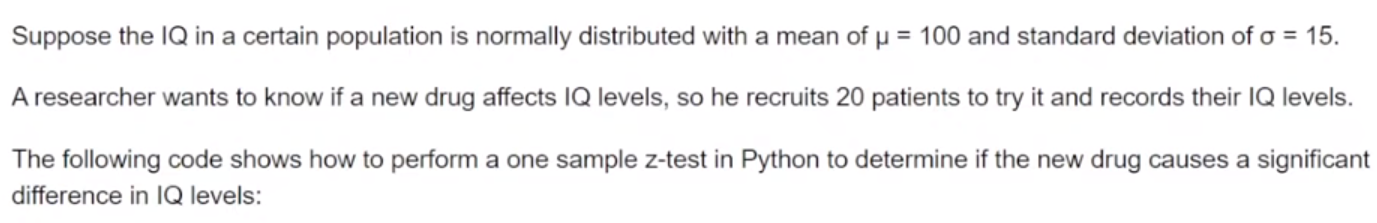

In [ ]:
from statsmodels.stats.weightstats import ztest as ztest

In [ ]:
data = [88, 92, 94, 94, 96, 97, 97, 97, 99, 99, 105, 109, 109, 109, 110, 112, 112, 113, 114, 115]

In [ ]:
mean = 100

ztest(data, value = mean)
# z-score, p-value

(1.5976240527147705, 0.1101266701438426)

p-value jest mniejsze niż 0,05 (zakładany poziom istotności (significance value)), więc odrzucamy hipotezę zerową.
H0 = lek nie ma wpływu na IQ

###T-test

In [ ]:
import numpy as np

In [ ]:
# Population
ages = [10, 20, 35, 50, 28, 40, 55, 18, 16, 55, 30, 25, 43, 18, 30, 28, 14, 24, 16, 17, 32, 35, 26, 27, 65, 18, 43, 23, 21, 20, 19, 70]

In [ ]:
ages_mean = np.mean(ages)
ages_mean

30.34375

In [ ]:
# Sample
sample_size = 10
ages_sample = np.random.choice(ages, sample_size)
ages_sample

array([21, 55, 16, 25, 17, 65, 35, 24, 55, 32])

In [ ]:
np.mean(ages_sample)

34.5

In [ ]:
from scipy.stats import ttest_1samp

In [ ]:
ttest_1samp(ages_sample,ages_mean)

TtestResult(statistic=0.7440218729914888, pvalue=0.4758387357986755, df=9)

- Zakładając, że poziom ufności (confidence interval) = 95% => poziom istotności (significance level) = 0,05.
- p_value > 0,05 - Zakładając poziom ufności na poziomie 95%, oznacza to, że jeśli wartość p (p-value) jest mniejsza niż 0,05 (lub równa), to odrzucimy hipotezę zerową i stwierdzimy, że wyniki są statystycznie istotne na poziomie ufności 95%.
- W tym przypadku otrzymana wartość p-value wynosi 0,756, co jest większe niż 0,05. Oznacza to, że nie ma wystarczających dowodów na odrzucenie hipotezy zerowej na poziomie ufności 95%. Można zatem stwierdzić, że brak jest istotnego statystycznie wpływu badanej zmiennej na wyniki.

In [ ]:
_, p_val = ttest_1samp(ages_sample,ages_mean)

In [ ]:
if p_val < 0.05:
  print('Reject H0')
else:
  print('Accept H0')

Accept H0


###Correlation

In [ ]:
import seaborn as sns

In [ ]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.corr()

<ipython-input-17-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


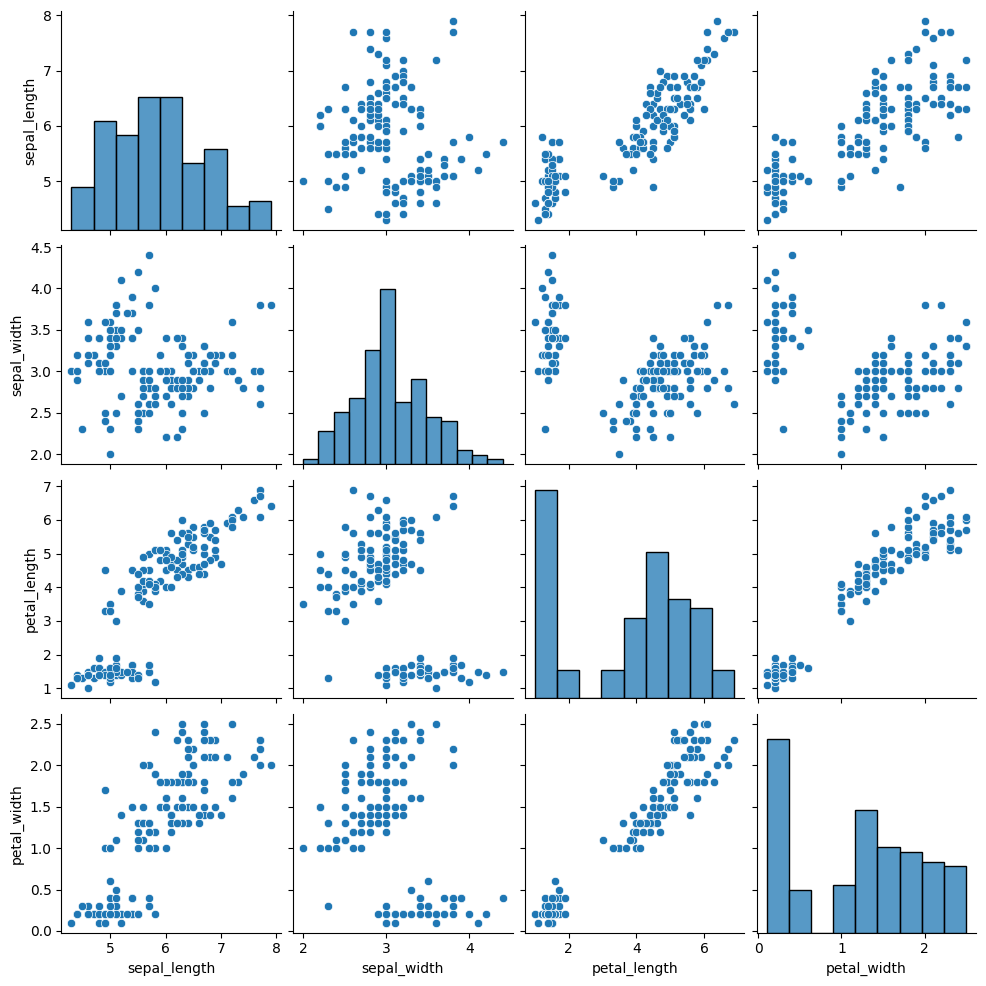

In [ ]:
sns.pairplot(df)